## Install Dependencies

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import random
import numpy as np

## Exploratory Data Analysis

In [2]:
# path initialization
images_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images'
train_data = images_path + '/train/'
val_data = images_path + '/validation/'
test_data = images_path + '/test/'

* There are a total of 21000 images from 15 classes
* Each class contains 1400 images of size 224x224
* The dataset split 70% for training, 15% for validation, and 15% for testing purpose

There are three folders:

* train (15000 images)
* test (3000 images)
* validation (3000 images)

In [3]:
subdirectories = [f.name for f in os.scandir(train_data) if f.is_dir()]

print("Vegetable names:")
for subdir in subdirectories:
    print(subdir)

print(f"\n Number of classes: {len(subdirectories)}")

Vegetable names:
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato

 Number of classes: 15


In [4]:
# function to plot image randomly
def plot_image(data=train_data, n_rows=3, n_cols=7):
    subdirectories = [f.name for f in os.scandir(data) if f.is_dir()]
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, int(n_rows*2.5)))
    axes = axes.flatten()
    
    for i in range(n_rows * n_cols):
        class_name = random.choice(subdirectories) # take random path from directory, example: tomato
        class_path = os.path.join(data, class_name) # train/tomato
        image_name = random.choice(os.listdir(class_path)) # 0001.jpg (pick image randomly)
        image_path = os.path.join(class_path, image_name) # train/tomato/0001.jpg
        img = mpimg.imread(image_path) # read every randomly picked image
        
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"{class_name} \n{img.shape}")

    plt.tight_layout()
    plt.show()

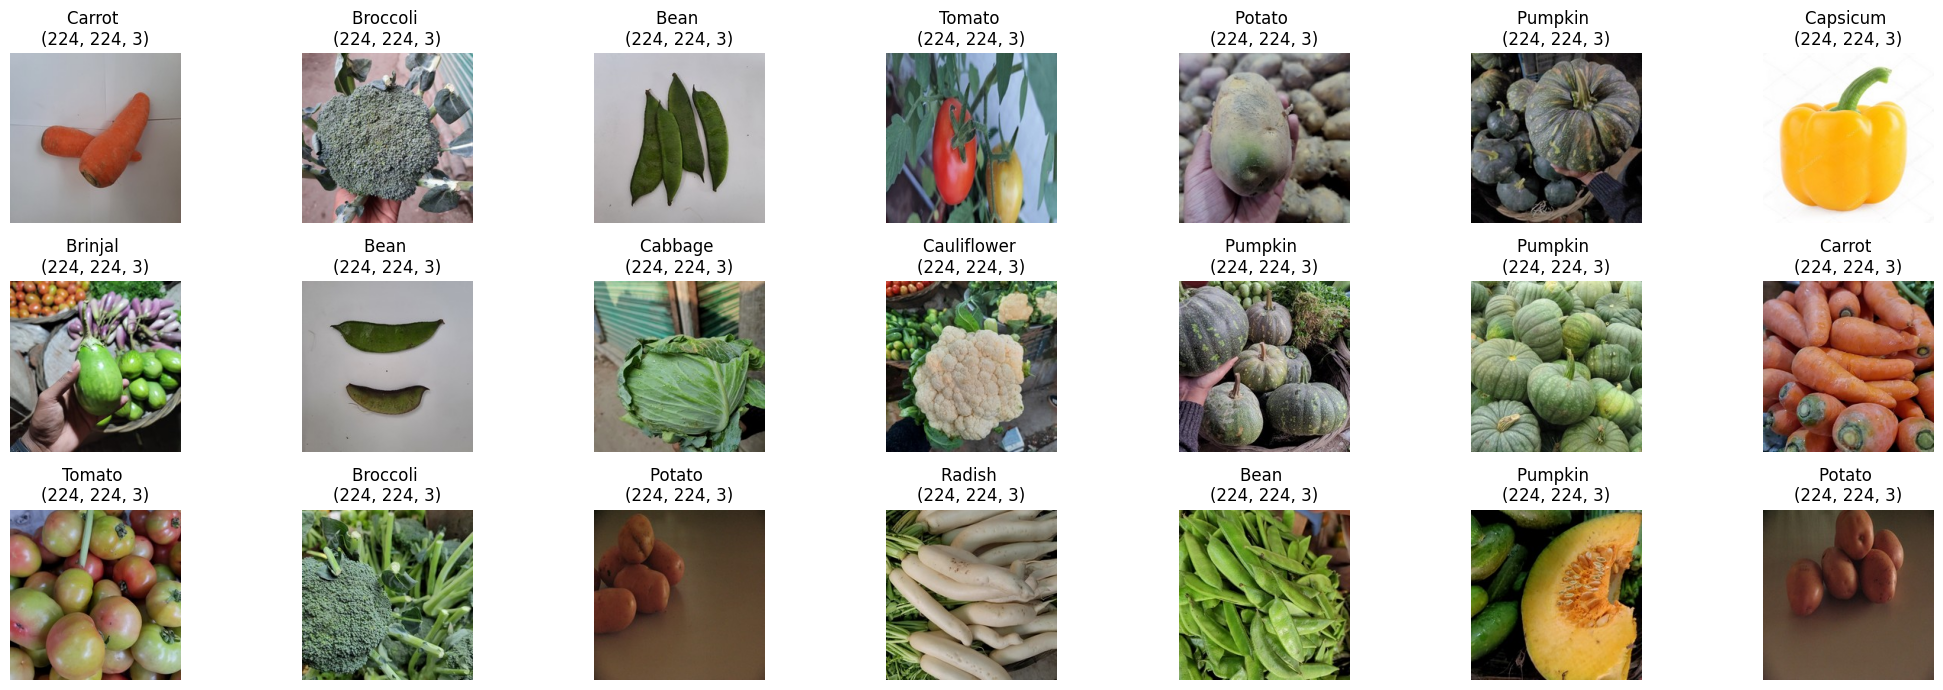

In [5]:
plot_image() # train images

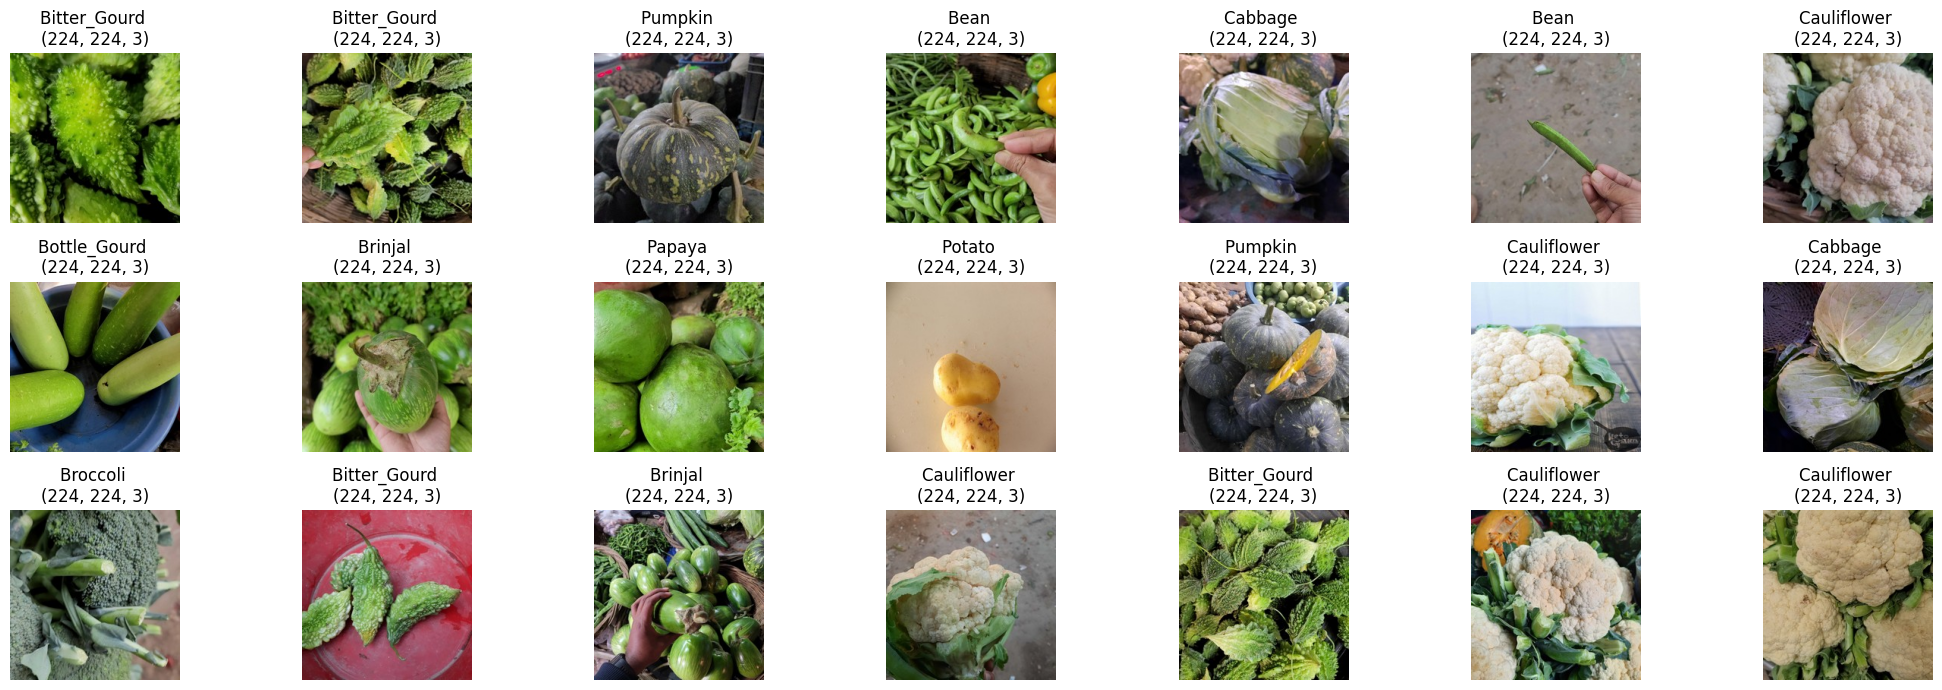

In [6]:
plot_image(val_data) # validation images

In [7]:
# function to count images per class
def count_images_per_class(images_path):
    subdirectories = [f.name for f in os.scandir(images_path) if f.is_dir()]
    class_counts = []

    for subdir in subdirectories:
        class_path = os.path.join(images_path, subdir)
        num_images = len(os.listdir(class_path))
        class_counts.append((subdir, num_images))
    
    return class_counts

# function to plot class distribution
def plot_class_distribution(class_counts):
    classes, counts = zip(*class_counts)
    colors = [plt.cm.viridis(random.random()) for _ in range(len(classes))]  # pick color randomly

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color=colors)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

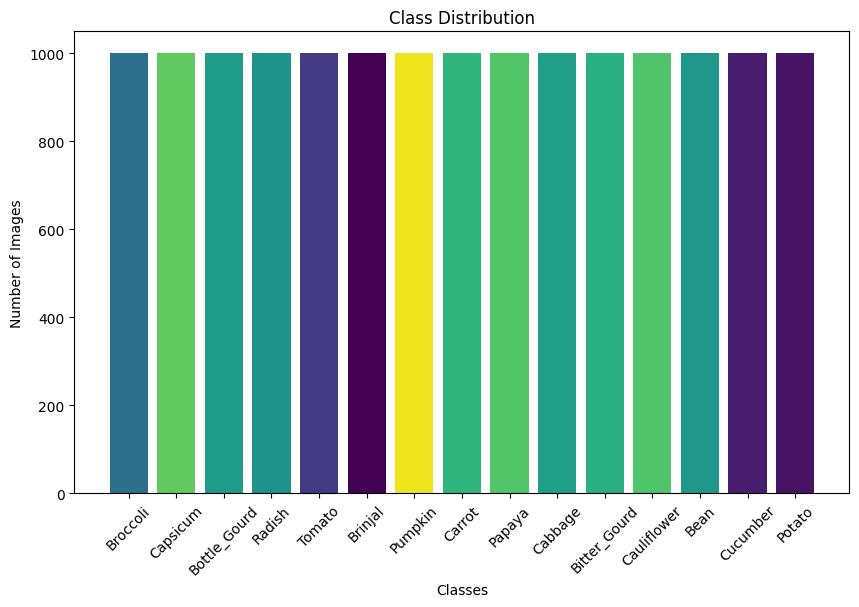

In [8]:
# class distribution of train data
class_counts = count_images_per_class(train_data)
plot_class_distribution(class_counts)

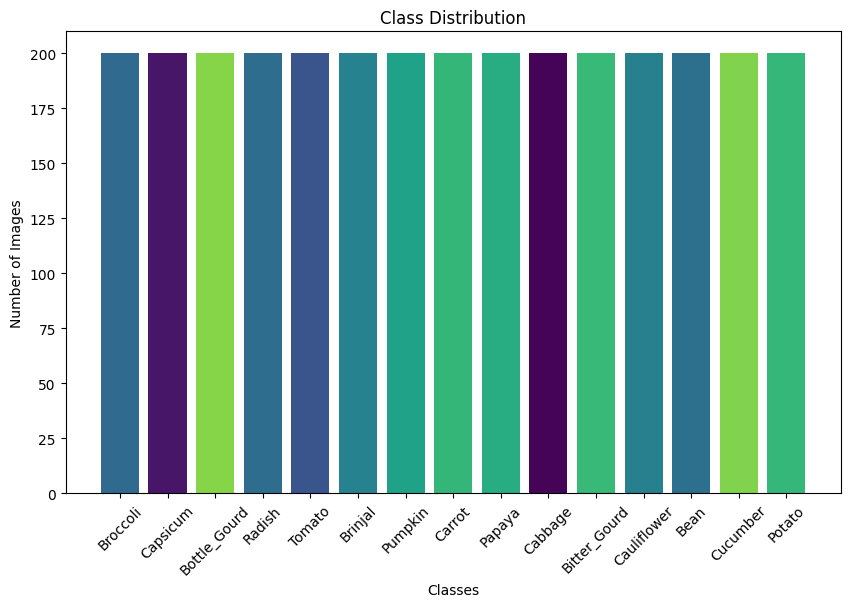

In [9]:
# class distribution of validation data
class_counts = count_images_per_class(val_data)
plot_class_distribution(class_counts)

In [10]:
# Count the number of files in each subfolder in a directory
def count_files(rootdir):
    for dirpath, _, filenames in os.walk(rootdir):
        file_count = sum(1 for file in filenames if os.path.isfile(os.path.join(dirpath, file)))
        if file_count > 0:
            print(f"There are {file_count} files in {os.path.basename(dirpath)}")

count_files(train_data)

There are 1000 files in Broccoli
There are 1000 files in Capsicum
There are 1000 files in Bottle_Gourd
There are 1000 files in Radish
There are 1000 files in Tomato
There are 1000 files in Brinjal
There are 1000 files in Pumpkin
There are 1000 files in Carrot
There are 1000 files in Papaya
There are 1000 files in Cabbage
There are 1000 files in Bitter_Gourd
There are 1000 files in Cauliflower
There are 1000 files in Bean
There are 1000 files in Cucumber
There are 1000 files in Potato


The training data is balanced

## Data Preprocessing

In [11]:
# Image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)

In [12]:
train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode="categorical",
                                                    seed=42,
                                                    subset="training")

validation_gen = train_datagen.flow_from_directory(train_data,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   shuffle=True,
                                                   class_mode="categorical",
                                                   seed=42,
                                                   subset="validation")

Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Model Development Using CNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [14]:
# checking GPU
if tf.test.gpu_device_name():
    print(f"GPU detected: {tf.test.gpu_device_name()}")
else:
    print("No GPU detected")

GPU detected: /device:GPU:0


In [15]:
model = Sequential()
model.add(Conv2D(20, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(20, (3,3), activation='relu'))
model.add(MaxPool2D((2,2), padding='valid'))

model.add(Conv2D(50, (3,3), activation='relu'))
model.add(Conv2D(50, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(15, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 20)      560       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 20)      3620      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 20)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 50)      9050      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 50)      22550     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 50)        0         
 g2D)                                                   

In [17]:
#compile model
model.compile(loss="categorical_crossentropy", optimizer= Adam(), metrics=["accuracy","mse"])

## Model Training

In [18]:
# add early stop to the model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
early_stop = EarlyStopping(monitor="val_loss", patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4, verbose=1, min_delta=1e-4) 
callbacks_list = [early_stop, reduce_lr]

In [19]:
history = model.fit(train_generator,
                        validation_data=validation_gen,
                        epochs = 15, 
                        callbacks = callbacks_list)

Epoch 1/15
375/375 [==============================] - 282s 710ms/step - loss: 1.3666 - accuracy: 0.5461 - mse: 0.0384 - val_loss: 1.0229 - val_accuracy: 0.6827 - val_mse: 0.0307 - lr: 0.0010
Epoch 2/15
375/375 [==============================] - 186s 495ms/step - loss: 0.7808 - accuracy: 0.7556 - mse: 0.0235 - val_loss: 0.6494 - val_accuracy: 0.7853 - val_mse: 0.0200 - lr: 0.0010
Epoch 3/15
375/375 [==============================] - 184s 492ms/step - loss: 0.6208 - accuracy: 0.8032 - mse: 0.0189 - val_loss: 0.7105 - val_accuracy: 0.7793 - val_mse: 0.0210 - lr: 0.0010
Epoch 4/15
375/375 [==============================] - 184s 490ms/step - loss: 0.5176 - accuracy: 0.8348 - mse: 0.0159 - val_loss: 0.5444 - val_accuracy: 0.8263 - val_mse: 0.0167 - lr: 0.0010
Epoch 5/15
375/375 [==============================] - 184s 492ms/step - loss: 0.4754 - accuracy: 0.8525 - mse: 0.0145 - val_loss: 0.4157 - val_accuracy: 0.8607 - val_mse: 0.0133 - lr: 0.0010
Epoch 6/15
375/375 [=========================

In [20]:
def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f"val_{metric}"])
    plt.title(f"model {metric}")
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

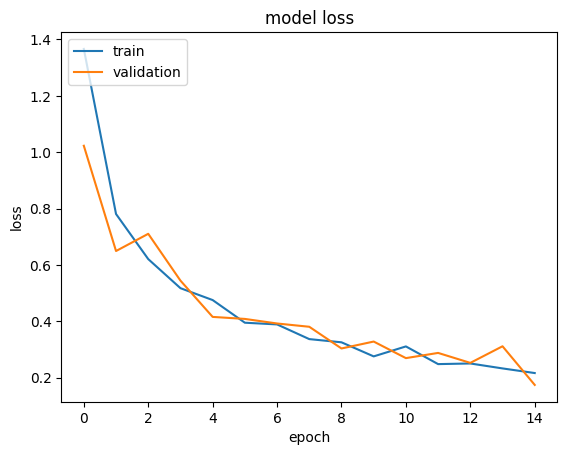

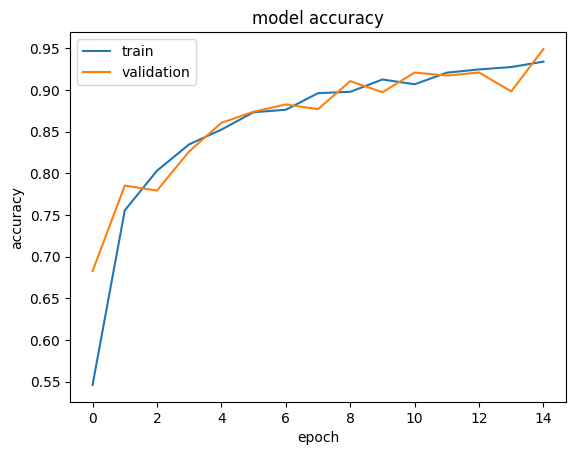

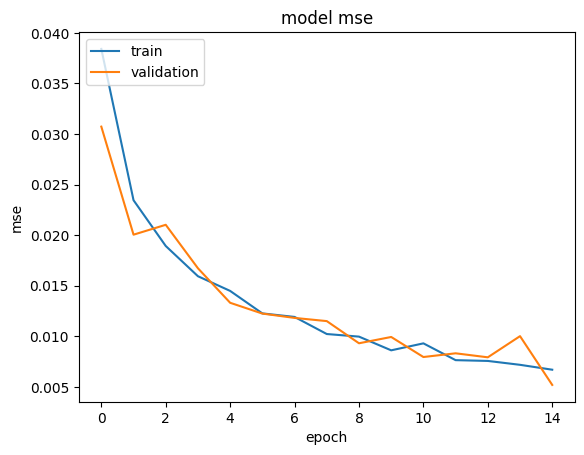

In [21]:
plot_metric(history, "loss")
plot_metric(history, "accuracy")
plot_metric(history, "mse")

In [22]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
val_data = val_datagen.flow_from_directory(val_data,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical',
                                           seed=42)

test_data = test_datagen.flow_from_directory(test_data,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)

Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## CNN Model Evaluation

In [24]:
scores_cnn = model.evaluate(val_data)

94/94 [==============================] - 26s 282ms/step - loss: 0.1893 - accuracy: 0.9497 - mse: 0.0054


In [25]:
print("Validation Accuracy: {:.3f}".format(scores_cnn[1]))

Validation Accuracy: 0.950


In [26]:
predictions = model.predict(test_data)

94/94 [==============================] - 24s 251ms/step


In [27]:
# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_data.classes)

print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 95.33%


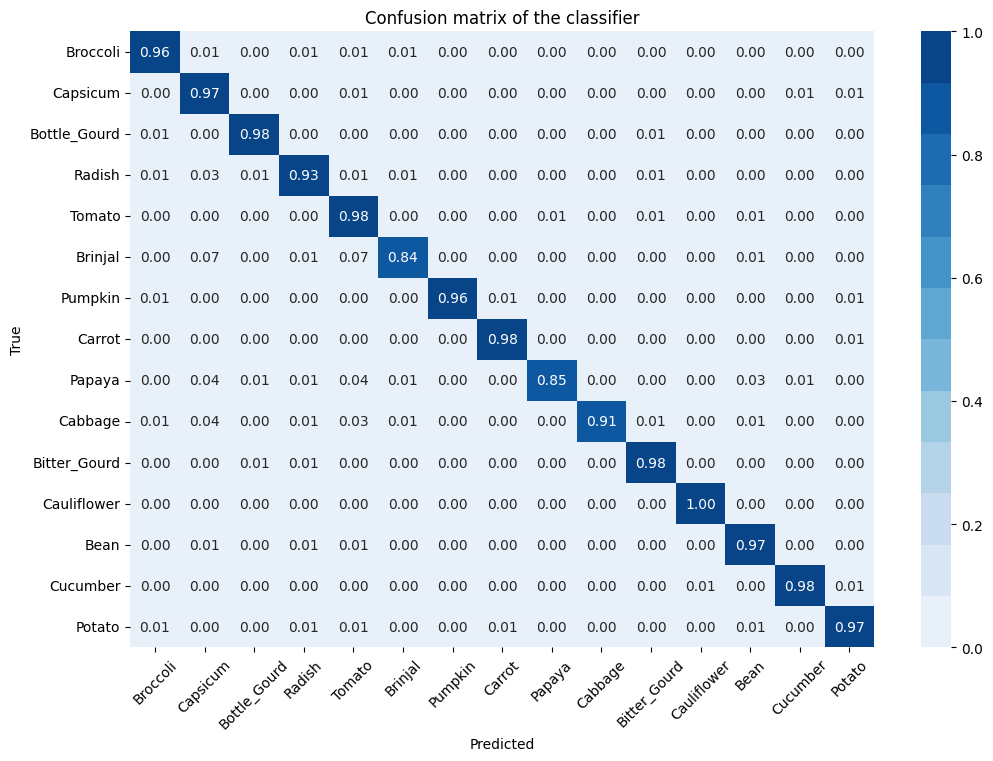

In [28]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes
cm = confusion_matrix(y_true_class, y_pred_class, normalize='true')

plt.figure(figsize=(12,8))
plt.title('Confusion matrix of the classifier')
sns.heatmap(cm,
            annot=True, 
            fmt=".2f",
            cmap=sns.color_palette("Blues",12),
            yticklabels=subdirectories,
            xticklabels=subdirectories)

plt.xticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [29]:
# save model
import pathlib

export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# convert SavedModel to vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

8574192

## Transfer Learning

In [30]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Dropout

# Load the InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 1s 0us/step


In [31]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation="relu")(x)
x = Dropout(0.2)(x)

prediction = Dense(15, activation="softmax")(x)

model_tf = Model(inputs=base_model.input, outputs=prediction)

model_tf.compile(
  loss="categorical_crossentropy",
  optimizer="adam",
  metrics=["accuracy"]
)

## Model Training

In [32]:
hist = model_tf.fit(
  train_generator,
  validation_data = validation_gen,
  epochs = 5,
  steps_per_epoch = len(train_generator),
  validation_steps = len(validation_gen)
)

Epoch 1/5
375/375 [==============================] - 211s 544ms/step - loss: 0.3640 - accuracy: 0.8878 - val_loss: 0.1236 - val_accuracy: 0.9610
Epoch 2/5
375/375 [==============================] - 196s 524ms/step - loss: 0.1311 - accuracy: 0.9595 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 3/5
375/375 [==============================] - 194s 517ms/step - loss: 0.0978 - accuracy: 0.9687 - val_loss: 0.0757 - val_accuracy: 0.9763
Epoch 4/5
375/375 [==============================] - 189s 504ms/step - loss: 0.0821 - accuracy: 0.9747 - val_loss: 0.0484 - val_accuracy: 0.9823
Epoch 5/5
375/375 [==============================] - 191s 508ms/step - loss: 0.0811 - accuracy: 0.9740 - val_loss: 0.0432 - val_accuracy: 0.9870


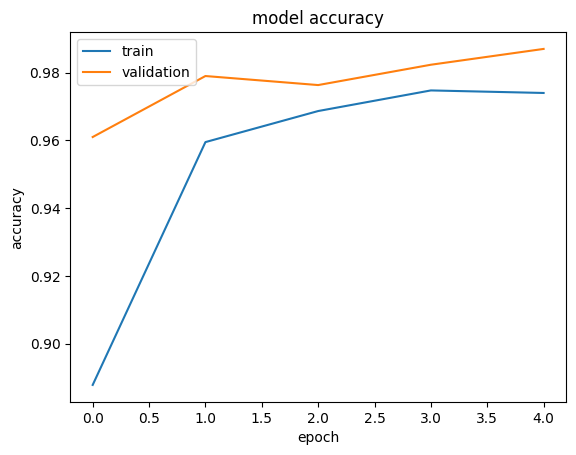

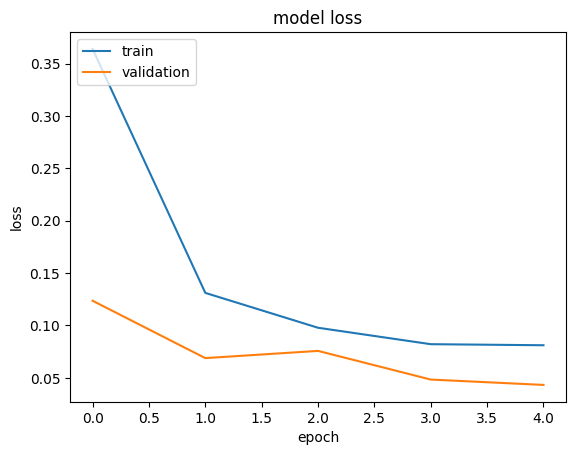

In [33]:
plot_metric(hist, "accuracy")
plot_metric(hist, "loss")

## InceptionV3 Model Evaluation

In [34]:
scores_tf = model_tf.evaluate(val_data)

94/94 [==============================] - 10s 107ms/step - loss: 0.0342 - accuracy: 0.9883


In [35]:
print("Validation Accuracy: {:.3f}".format(scores_tf[1]))

Validation Accuracy: 0.988


In [36]:
predictions = model_tf.predict(test_data)

94/94 [==============================] - 12s 112ms/step


In [37]:
# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_data.classes)

print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 99.00%


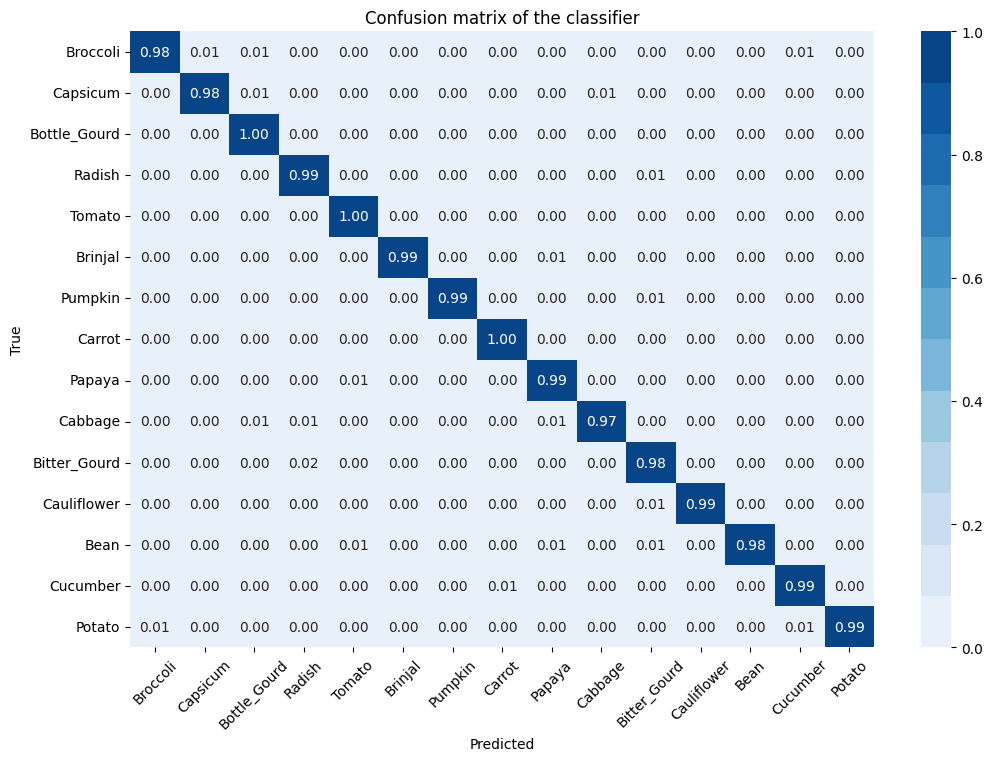

In [38]:
# confusion matrix
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes
cm = confusion_matrix(y_true_class, y_pred_class, normalize='true')

plt.figure(figsize=(12,8))
plt.title('Confusion matrix of the classifier')
sns.heatmap(cm,
            annot=True, 
            fmt=".2f",
            cmap=sns.color_palette("Blues",12),
            yticklabels=subdirectories,
            xticklabels=subdirectories)

plt.xticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

* Transfer Learning model accuracy: 99%
* CNN model accuracy: 95.33 %
* The Transfer Learning model accuracy, compared to CNN model, is only slightly higher, approximately 3.67%. Although both models perform well, there are some noteworthy differences.
* In term of training time, the CNN model required a significantly longer duration as it underwent 15 epochs, while Transfer Learning model only needed 5 epochs, making it notably faster. Thus, if time efficiency is a critical factor, Transfer Learning model emerges as the preferable choice.
* In terms of accuracy, the transfer learning model appears to be the more favorable option.
* In conclusion, both models have their strengths and weaknesses. If accuracy is the primary concern and the Transfer Learning model performs well on most classes, it might be the better choice.